<a href="https://colab.research.google.com/github/1004516/SE-ALES-Y-SISTEMAS/blob/main/EJERCICIOS%20TALLER%202/Simulacion%20Punto%201%2C6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         player = https://www.youtube.com/s/player/7f3b257d/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Fragmento cargado: 5.00 s, fs = 48000 Hz, muestras = 240000


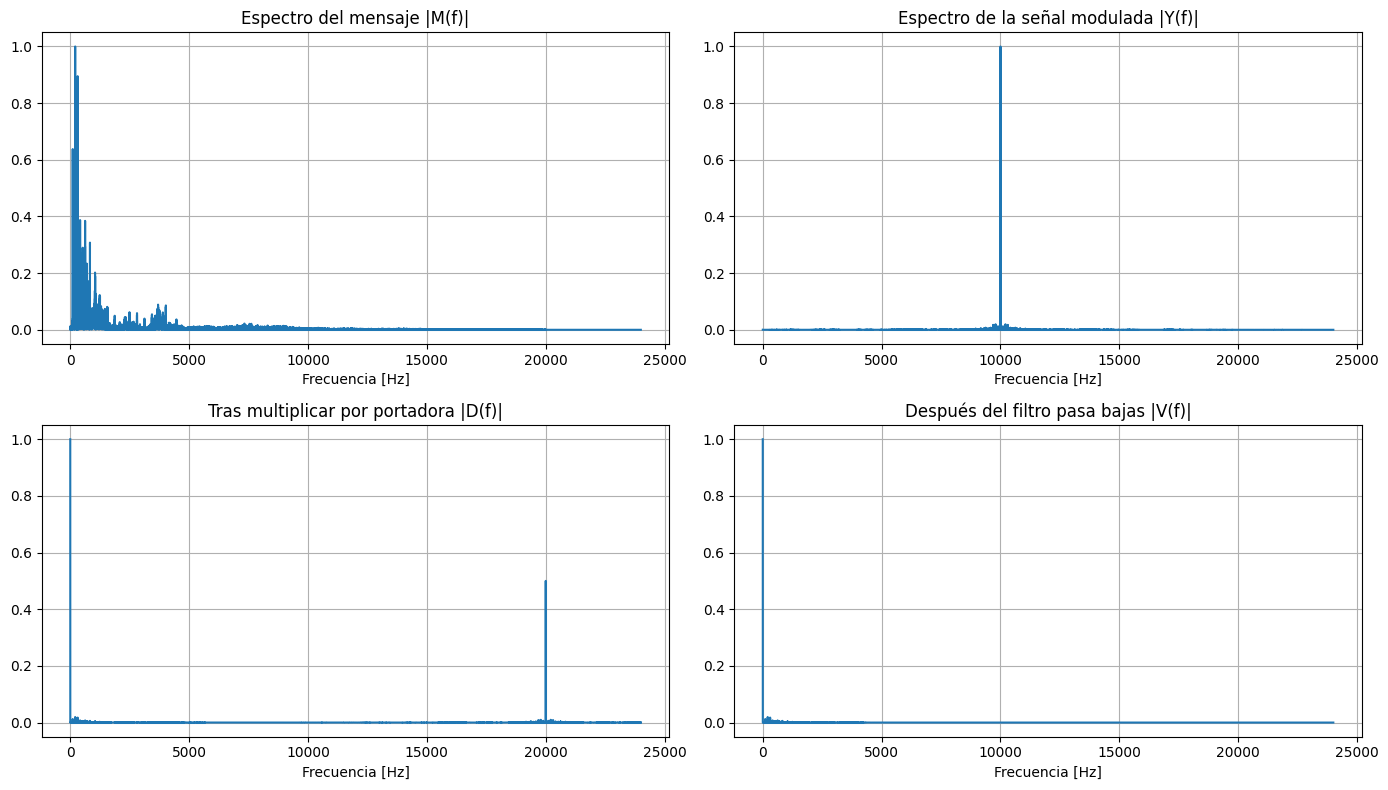

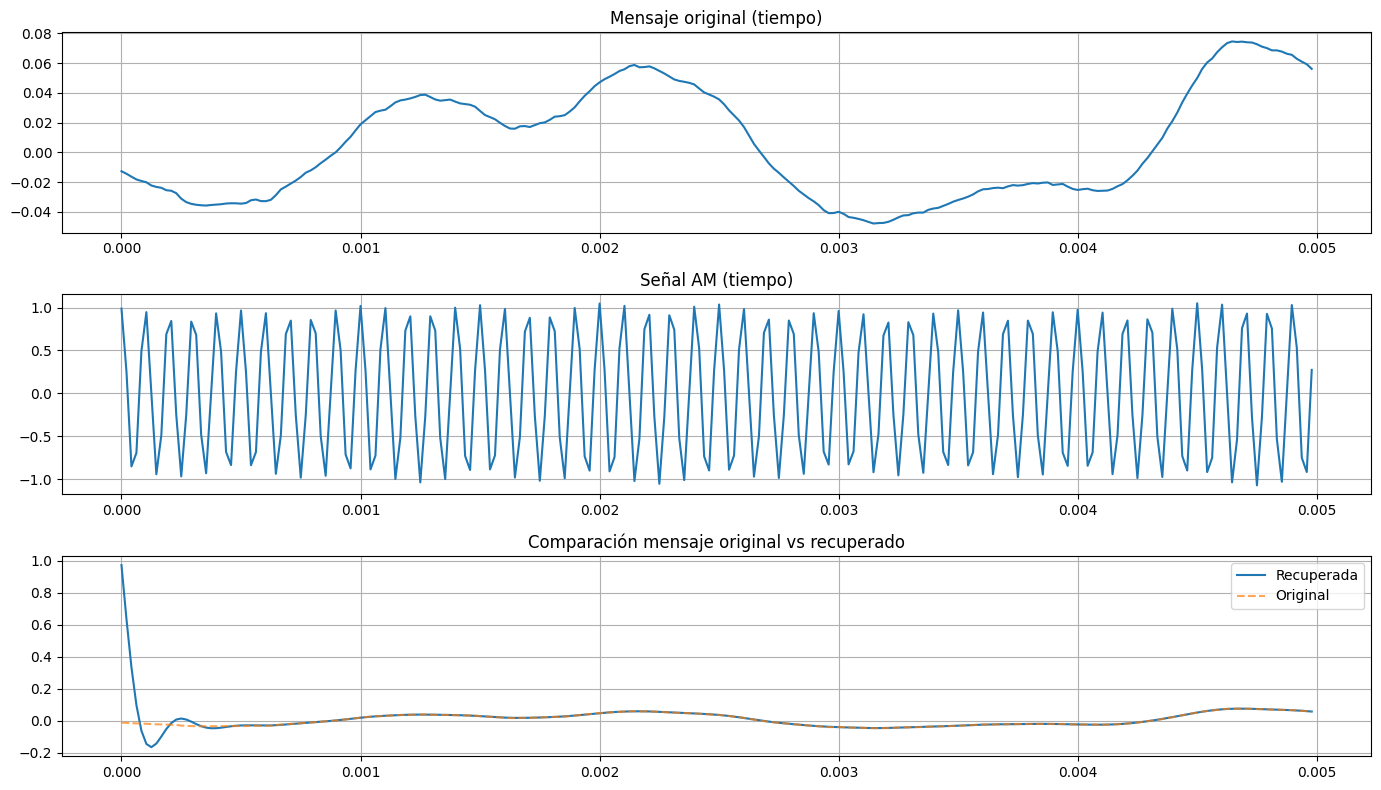

✅ Simulación completada correctamente.
Fragmento reproducido: 5 s, índice de modulación m = 1.0, fc = 10000 Hz


In [23]:
# ================================================================
# Taller 2 - Señales y Sistemas 2025
# Punto 1.6 - Modulación AM con detección coherente
# ================================================================
# ---------------------------------------------------------------

# --- Instalación de dependencias ---
!pip install yt-dlp pydub ffmpeg-python -q

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
from numpy.fft import rfft, rfftfreq
from IPython.display import Audio, display
import yt_dlp
import os

# ------------------------------------------------------------
# 1. Descarga de un fragmento de 5 s de una canción de YouTube
# ------------------------------------------------------------
# 👉 Cambia la URL por la canción que quieras
url = "https://www.youtube.com/watch?v=2Vv-BfVoq4g"  # ejemplo: Ed Sheeran - Perfect
start_time = 20   # segundo inicial
duration = 5      # segundos de duración

# Descarga con yt_dlp solo el audio
ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': 'song.%(ext)s',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
        'preferredquality': '192',
    }],
    'quiet': True
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url])

# Recorta los 5 segundos deseados
import ffmpeg
input_file = "song.wav"
output_file = "fragmento_5s.wav"
ffmpeg.input(input_file, ss=start_time, t=duration).output(output_file).overwrite_output().run(quiet=True)

# ------------------------------------------------------------
# 2. Lectura y normalización del audio
# ------------------------------------------------------------
fs_audio, msg = wavfile.read(output_file)
msg = msg.astype(float)
if msg.ndim > 1:  # convertir a mono si es estéreo
    msg = np.mean(msg, axis=1)
msg = msg / np.max(np.abs(msg))
t = np.arange(len(msg)) / fs_audio
T = len(t)/fs_audio

print(f"Fragmento cargado: {T:.2f} s, fs = {fs_audio} Hz, muestras = {len(msg)}")

display(Audio(msg, rate=fs_audio))  # reproducir mensaje original

# ------------------------------------------------------------
# 3. Parámetros de modulación
# ------------------------------------------------------------
fc = 10000       # frecuencia portadora [Hz]
Ac = 1.0         # amplitud portadora
m = 1.0          # índice de modulación
fs = fs_audio

# ------------------------------------------------------------
# 4. Modulación AM
# ------------------------------------------------------------
y = Ac * (1 + m * msg/Ac) * np.cos(2*np.pi*fc*t)
display(Audio(y, rate=fs))  # señal modulada

# ------------------------------------------------------------
# 5. Demodulación coherente
# ------------------------------------------------------------
demod = y * np.cos(2*np.pi*fc*t)  # multiplicador coherente

# Filtro pasa-bajas Butterworth
cutoff = 4000  # Hz (banda audible)
b, a = butter(4, cutoff/(fs/2), btype='low')
v = filtfilt(b, a, demod)

# Recuperación (quitar DC y escalar)
m_rec = (v - np.mean(v)) * (2/m)
display(Audio(m_rec, rate=fs))  # mensaje recuperado

# ------------------------------------------------------------
# 6. Espectros y visualización
# ------------------------------------------------------------
def spectrum(x, fs):
    X = np.abs(rfft(x))
    f = rfftfreq(len(x), 1/fs)
    return f, X/np.max(X)

f_msg, M = spectrum(msg, fs)
f_y, Y = spectrum(y, fs)
f_demod, D = spectrum(demod, fs)
f_v, V = spectrum(v, fs)

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(f_msg, M)
plt.title("Espectro del mensaje |M(f)|")
plt.xlabel("Frecuencia [Hz]"); plt.grid(True)

plt.subplot(2,2,2)
plt.plot(f_y, Y)
plt.title("Espectro de la señal modulada |Y(f)|")
plt.xlabel("Frecuencia [Hz]"); plt.grid(True)

plt.subplot(2,2,3)
plt.plot(f_demod, D)
plt.title("Tras multiplicar por portadora |D(f)|")
plt.xlabel("Frecuencia [Hz]"); plt.grid(True)

plt.subplot(2,2,4)
plt.plot(f_v, V)
plt.title("Después del filtro pasa bajas |V(f)|")
plt.xlabel("Frecuencia [Hz]"); plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 7. Gráficas en tiempo (primeros milisegundos)
# ------------------------------------------------------------
Nplot = int(0.005*fs)
plt.figure(figsize=(14,8))
plt.subplot(3,1,1)
plt.plot(t[:Nplot], msg[:Nplot])
plt.title("Mensaje original (tiempo)")
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t[:Nplot], y[:Nplot])
plt.title("Señal AM (tiempo)")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t[:Nplot], m_rec[:Nplot], label="Recuperada")
plt.plot(t[:Nplot], msg[:Nplot], '--', label="Original", alpha=0.7)
plt.title("Comparación mensaje original vs recuperado")
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Simulación completada correctamente.")
print(f"Fragmento reproducido: {duration} s, índice de modulación m = {m}, fc = {fc} Hz")
